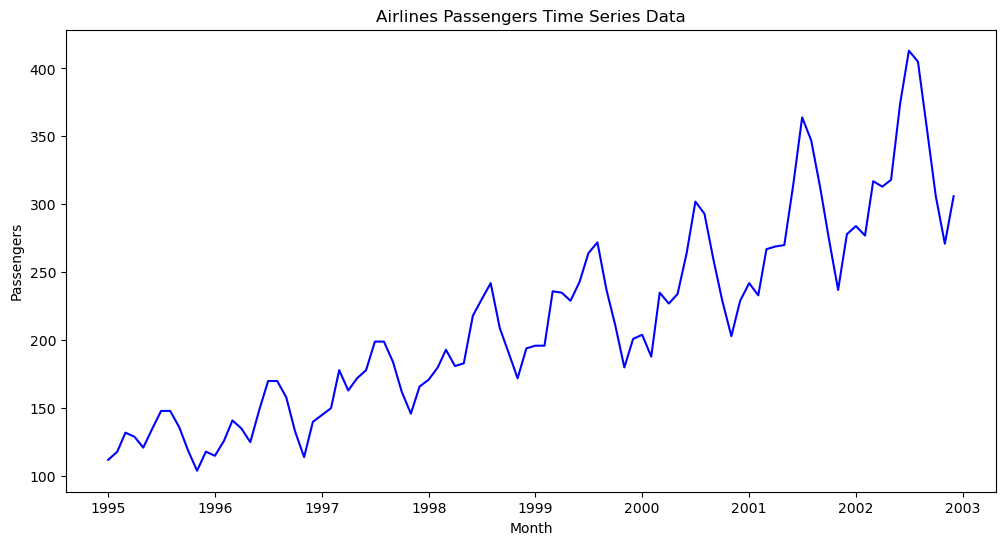

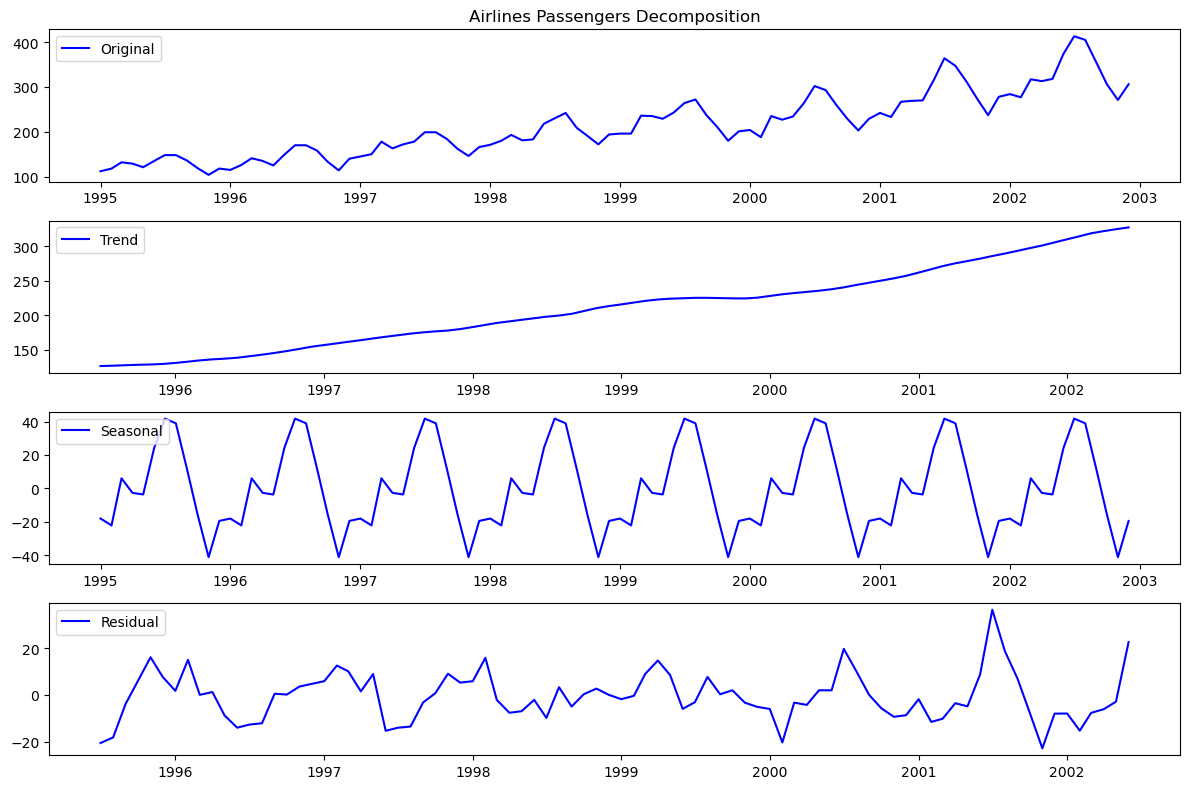

<Figure size 1000x400 with 0 Axes>

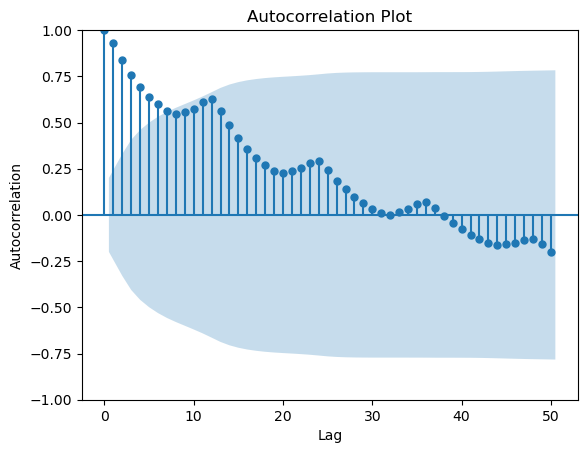

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


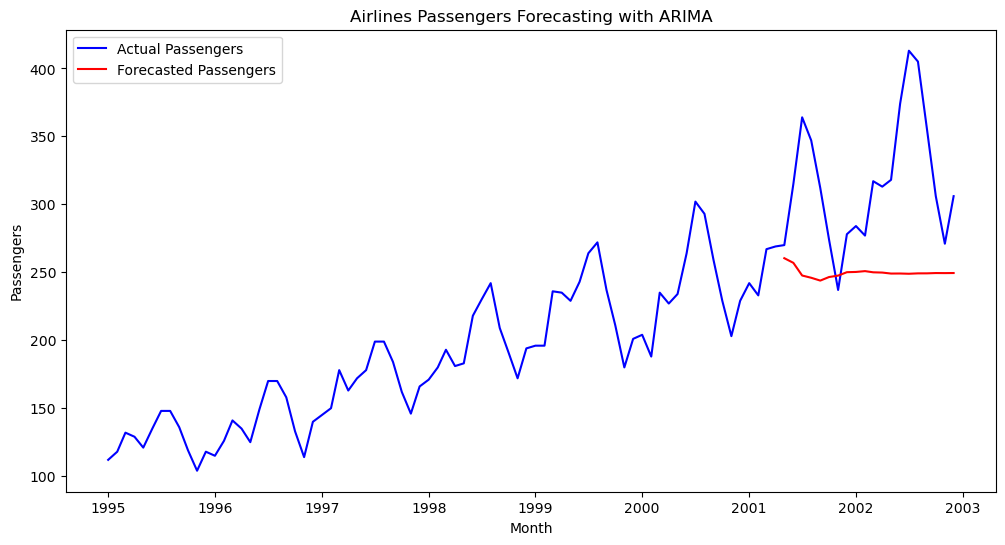

RMSE for Airlines Passengers Forecasting: 81.67920973707895


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf


airlines_df = pd.read_excel(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\Forcasting\Airlines+Data.xlsx")


airlines_df['Month'] = pd.to_datetime(airlines_df['Month'])
airlines_df.set_index('Month', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(airlines_df.index, airlines_df['Passengers'], color='blue')
plt.title('Airlines Passengers Time Series Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()


decomposition = seasonal_decompose(airlines_df['Passengers'], period=12)  
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(airlines_df.index, airlines_df['Passengers'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Airlines Passengers Decomposition')
plt.subplot(412)
plt.plot(airlines_df.index, trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(airlines_df.index, seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(airlines_df.index, residual, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()


plt.figure(figsize=(10, 4))
plot_acf(airlines_df['Passengers'], lags=50)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


train_size = int(len(airlines_df) * 0.8)
train, test = airlines_df[:train_size], airlines_df[train_size:]


model = ARIMA(train, order=(5, 1, 2)) 
fit_model = model.fit()


forecast = fit_model.forecast(steps=len(test))


rmse = sqrt(mean_squared_error(test, forecast))


plt.figure(figsize=(12, 6))
plt.plot(airlines_df.index, airlines_df['Passengers'], label='Actual Passengers', color='blue')
plt.plot(test.index, forecast, label='Forecasted Passengers', color='red')
plt.title('Airlines Passengers Forecasting with ARIMA')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

print(f"RMSE for Airlines Passengers Forecasting: {rmse}")
